In [5]:
import pandas as pd
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt 

health = pd.read_csv('heart.csv')
health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
print(health.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


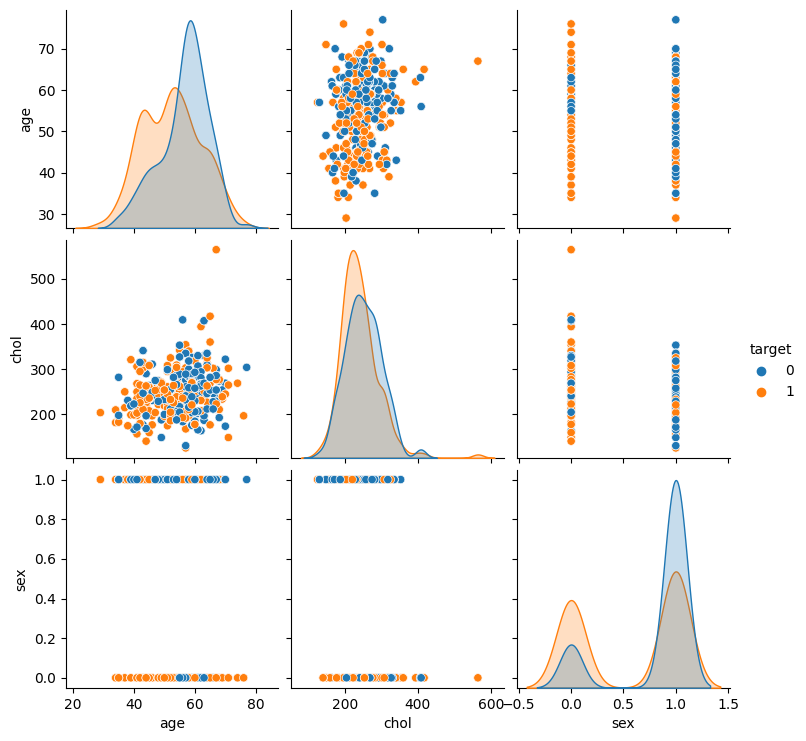

In [21]:
sns.pairplot(health, vars= ['age','chol','sex',], hue ='target' )

plt.show()

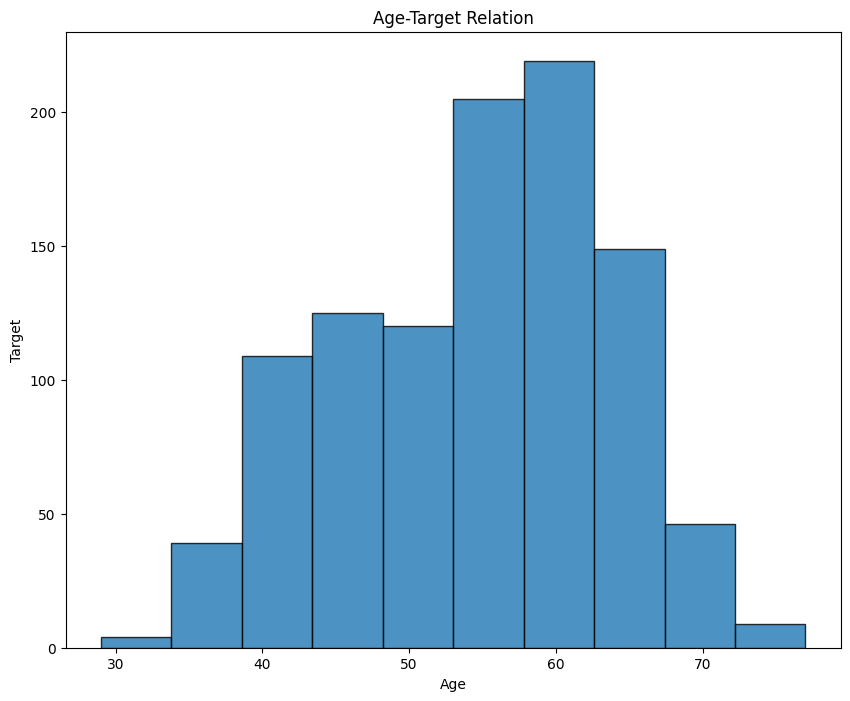

In [17]:
#Visuallization
plt.figure(figsize=(10,8))
plt.hist(health['age'], bins=10 , alpha=0.8, edgecolor='k')
plt.title("Age-Target Relation")
plt.xlabel("Age")
plt.ylabel("Target")
plt.show()

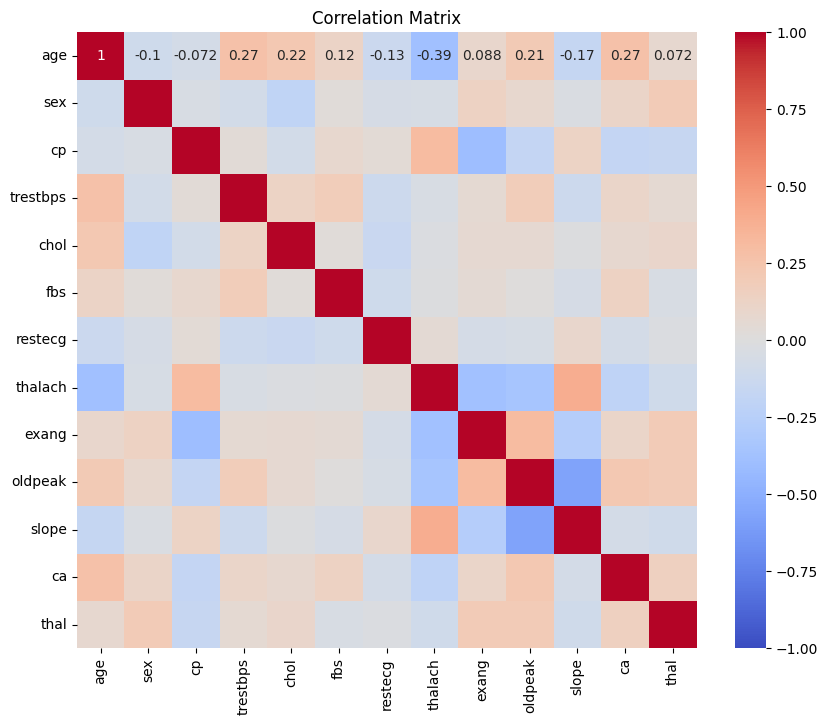

In [22]:
plt.figure(figsize=(10,8))
corr_matrix= health.drop(columns= 'target').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin= -1,vmax= 1 )
plt.title('Correlation Matrix')
plt.show()

In [31]:
## Tests

# Normalite test
#shapiro-wiik
p_value= stats.shapiro(health['age'])
print(f"Shapiro-Test p-value(Age): {p_value}")

Shapiro-Test p-value(Age): ShapiroResult(statistic=0.9843624234199524, pvalue=5.04160047043456e-09)


In [30]:
#D'Agostino's K^2 Test
p_value= stats.normaltest(health['chol'])
print(f"D'Agostino k^2 Test(Cholesterol): {p_value}")

D'Agostino k^2 Test(Cholesterol): NormaltestResult(statistic=236.90451721749486, pvalue=3.604439308229946e-52)


In [29]:
#Anderson-Daarling Test
p_value = stats.anderson(health['age'])
print(f"Anderson Test(Age): {p_value}")

Anderson Test(Age): AndersonResult(statistic=5.827223508448242, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=54.43414634146342, scale=9.072290233244281)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [32]:
#Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

model= ols('age ~ target', data= health).fit()
anova_table= sm.stats.anova_lm(model,typ=2)
print(anova_table)

                sum_sq      df          F        PR(>F)
target     4432.320377     1.0  56.785135  1.067722e-13
Residual  79849.484501  1023.0        NaN           NaN


In [41]:
from scipy.stats import ttest_ind
#t-Test
group1 = health[health['target'] == 1]['age']
group2 = health[health['target'] == 0]['age']
stat, p = ttest_ind(group1, group2)
print(f't-Test Stat: {stat}, p-value: {p}')


t-Test Stat: -7.535591207962243, p-value: 1.0677220241596988e-13


In [45]:
#Chi-Square Test
#two different categorical column relation

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(health['sex'],health['target'])
stat, p , dof, expected = chi2_contingency(contingency_table)
print(f"Gender-Disease \n Chi-squareStat: {stat}, p-value: {p}")

Gender-Disease 
 Chi-squareStat: 78.86305133922973, p-value: 6.656820681726434e-19


In [47]:
#Kruskal Wallis Test
from scipy.stats import kruskal

g1= health[health['target'] == 1]['chol']
g2= health[health['target'] == 1]['chol']
stat, p= kruskal(g1,g2)
print(f"Target-Cholestrol\n Kruskal Wallis Stat, {stat} , p-value : {p}")


Target-Cholestrol
 Kruskal Wallis Stat, -4.548419328789747e-13 , p-value : 1.0


In [50]:
#Man- Whitney U Test
from scipy.stats import mannwhitneyu

g1= health[health['target'] == 1]['chol']
g2= health[health['target'] == 1]['chol']
stat, p= mannwhitneyu(g1,g2)
print(f"Target-Cholestrol\n Mann-Whitney U Stat, {stat} , p-value : {p}")


Target-Cholestrol
 Mann-Whitney U Stat, 138338.0 , p-value : 1.0
